# Ejercicio 1. Estimar el precio de venta de un coche de segunda mano en base a sus características

### Por: Luisa Fernanda Bolívar Arteaga 

Queremos estimar el precio de venta de un coche de segunda mano en base a sus características. Disponer de un algoritmo predictivo capaz de resolver esta tarea puede tener multitud de aplicaciones: sugerir precios en portales de compraventa online, tasación automática, etc.

A continuación desarrollo el paso a paso para dar respuesta a las preguntas planteadas en el instructivo de la Entrega 1. A lo largo del notebook se encuentran títulos donde se da respuesta a las preguntas planteadas en el instructivo de la Entrega 1; de igual forma, al finalizar consolido las mismas para facilidad de lectura. 



### Paso 1. Importar paquetes de librerías y set de datos de entrenamiento y test

In [1]:
pip install joblib


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [7]:
# Importamos los paquetes de las librerías necesarios

import joblib
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import sklearn.preprocessing as prep 
%matplotlib inline

In [8]:
# Se carga el dataset de train y test
import pandas as pd

pd.read_csv ("dataset_coches_train.csv")
pd.read_csv ("dataset_coches_test.csv")

#renombro para fácil manejo de los dataset posteriormente

coches_train = pd.read_csv("dataset_coches_train.csv") 
coches_test = pd.read_csv("dataset_coches_test.csv")

#creo un dataset que une los datos de entrenamiento y test, con el fin único de visualizar las distribuciones del dataset completo 

coches_dataset = pd.concat([coches_train, coches_test], ignore_index=True)


In [9]:
#visualizo el data set de entrenamiento para conocer su tamaño y contenido
coches_train

,ID,marca,modelo,fecha,tipo_cambio,total_km,tipo_combustible,consumo,tipo_motor,tasa,precio
0,13207,hyundi,Santa Fe,2019,Semi-Auto,4223,Diesel,5.91,2.2,145.0,31995
1,17314,vauxhall,GTC,2015,Manual,47870,Diesel,3.91,2.0,125.0,7700
2,12342,audi,RS4,2019,Automatic,5151,Petrol,8.08,2.9,145.0,58990
3,13426,vw,Scirocco,2016,Automatic,20423,Diesel,4.08,2.0,30.0,12999
4,16004,skoda,Scala,2020,Semi-Auto,3569,Petrol,4.99,1.0,145.0,16990
...,...,...,...,...,...,...,...,...,...,...,...
4955,16898,merc,GL Class,2015,Automatic,24314,Diesel,4.16,2.1,125.0,17999
4956,14416,bmw,6 Series,2017,Automatic,18000,Diesel,4.58,3.0,145.0,28900
4957,15453,vw,CC,2015,Manual,84932,Diesel,3.91,2.0,30.0,8998
4958,14666,audi,A7,2017,Semi-Auto,30150,Diesel,3.75,3.0,145.0,23198


In [10]:
#visualizo el data set de test para conocer su tamaño y contenido
coches_test

,ID,marca,modelo,fecha,tipo_cambio,total_km,tipo_combustible,consumo,tipo_motor,tasa,precio
0,12000,merc,GLS Class,2017,Automatic,12046,Diesel,6.32,3.0,150.0,38000
1,12001,vw,Amarok,2017,Automatic,37683,Diesel,6.50,3.0,260.0,23495
2,12004,merc,GLS Class,2019,Automatic,10000,Diesel,6.92,3.0,145.0,59999
3,12013,skoda,Scala,2019,Manual,3257,Petrol,4.74,1.0,145.0,16713
4,12017,audi,RS6,2015,Semi-Auto,20982,Petrol,8.00,4.0,325.0,46000
...,...,...,...,...,...,...,...,...,...,...,...
2667,19618,audi,A7,2015,Semi-Auto,21100,Petrol,7.92,4.0,325.0,28990
2668,19620,merc,CLS Class,2015,Automatic,60972,Diesel,4.50,3.0,160.0,17450
2669,19626,ford,Puma,2020,Manual,4111,Petrol,4.67,1.0,145.0,21995
2670,19630,merc,CLA Class,2016,Automatic,25726,Petrol,5.67,2.0,200.0,18700


# Información general de los datos

In [11]:
# Consulta para ver el tamaño de filas y columnas de cada dataset, confirmando los datos dados en las instrucciones de la entrega

coches_train.shape, coches_test.shape

((4960, 11), (2672, 11))

In [12]:
# Consula para visualizar el tipo de variables que contiene el dataset y el nombre de cada una
coches_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4960 entries, 0 to 4959
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                4960 non-null   int64  
 1   marca             4960 non-null   object 
 2   modelo            4960 non-null   object 
 3   fecha             4960 non-null   int64  
 4   tipo_cambio       4960 non-null   object 
 5   total_km          4960 non-null   int64  
 6   tipo_combustible  4960 non-null   object 
 7   consumo           4960 non-null   float64
 8   tipo_motor        4960 non-null   float64
 9   tasa              4960 non-null   float64
 10  precio            4960 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 426.4+ KB


In [13]:
# Consula para visualizar el tipo de variables que contiene el dataset y el nombre de cada una
coches_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2672 entries, 0 to 2671
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                2672 non-null   int64  
 1   marca             2672 non-null   object 
 2   modelo            2672 non-null   object 
 3   fecha             2672 non-null   int64  
 4   tipo_cambio       2672 non-null   object 
 5   total_km          2672 non-null   int64  
 6   tipo_combustible  2672 non-null   object 
 7   consumo           2672 non-null   float64
 8   tipo_motor        2672 non-null   float64
 9   tasa              2672 non-null   float64
 10  precio            2672 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 229.8+ KB


In [14]:
# Consula para visualizar la estadística descriptiva del data set de entrenamiento
coches_train.describe()

,ID,fecha,total_km,consumo,tipo_motor,tasa,precio
count,4960.000000,4960.000000,4960.000000,4960.00000,4960.000000,4960.000000,4960.000000
mean,15832.446169,2016.737903,24956.286895,5.37672,2.124375,152.332661,23469.943750
std,2206.717006,2.884035,24443.333662,3.14126,0.789368,82.403844,16406.714563
min,12002.000000,1997.000000,1.000000,0.50000,0.000000,0.000000,450.000000
25%,13929.250000,2016.000000,5641.250000,4.33000,1.600000,145.000000,12000.000000
50%,15840.000000,2017.000000,19000.000000,4.99000,2.000000,145.000000,18999.000000
75%,17765.750000,2019.000000,36702.000000,6.08000,2.800000,150.000000,30335.750000
max,19629.000000,2020.000000,259000.000000,84.01000,6.600000,580.000000,145000.000000


In [15]:
# Consula para visualizar la estadística descriptiva del dataset de test
coches_test.describe()

,ID,fecha,total_km,consumo,tipo_motor,tasa,precio
count,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000,2672.000000
mean,15784.043039,2016.720434,24617.528443,5.437833,2.135105,153.261602,23784.075599
std,2197.045979,2.898906,23142.032992,3.392526,0.768596,80.742530,16600.736576
min,12000.000000,1970.000000,1.000000,0.500000,0.000000,0.000000,795.000000
25%,13889.750000,2016.000000,6000.000000,4.330000,1.600000,145.000000,12490.750000
50%,15777.500000,2017.000000,18548.000000,4.990000,2.000000,145.000000,19495.000000
75%,17661.500000,2019.000000,36272.250000,6.240000,2.800000,160.000000,30500.000000
max,19631.000000,2020.000000,167054.000000,84.010000,6.300000,580.000000,159999.000000


In [16]:
coches_train.describe(include = 'all')

,ID,marca,modelo,fecha,tipo_cambio,total_km,tipo_combustible,consumo,tipo_motor,tasa,precio
count,4960.000000,4960,4960,4960.000000,4960,4960.000000,4960,4960.00000,4960.000000,4960.000000,4960.000000
unique,NaN,9,90,NaN,4,NaN,5,NaN,NaN,NaN,NaN
top,NaN,merc,Arteon,NaN,Manual,NaN,Diesel,NaN,NaN,NaN,NaN
freq,NaN,790,167,NaN,1948,NaN,2989,NaN,NaN,NaN,NaN
mean,15832.446169,NaN,NaN,2016.737903,NaN,24956.286895,NaN,5.37672,2.124375,152.332661,23469.943750
std,2206.717006,NaN,NaN,2.884035,NaN,24443.333662,NaN,3.14126,0.789368,82.403844,16406.714563
min,12002.000000,NaN,NaN,1997.000000,NaN,1.000000,NaN,0.50000,0.000000,0.000000,450.000000
25%,13929.250000,NaN,NaN,2016.000000,NaN,5641.250000,NaN,4.33000,1.600000,145.000000,12000.000000
50%,15840.000000,NaN,NaN,2017.000000,NaN,19000.000000,NaN,4.99000,2.000000,145.000000,18999.000000
75%,17765.750000,NaN,NaN,2019.000000,NaN,36702.000000,NaN,6.08000,2.800000,150.000000,30335.750000


In [17]:
coches_test.describe(include= 'all')

,ID,marca,modelo,fecha,tipo_cambio,total_km,tipo_combustible,consumo,tipo_motor,tasa,precio
count,2672.000000,2672,2672,2672.000000,2672,2672.000000,2672,2672.000000,2672.000000,2672.000000,2672.000000
unique,NaN,9,89,NaN,4,NaN,5,NaN,NaN,NaN,NaN
top,NaN,ford,Santa Fe,NaN,Manual,NaN,Diesel,NaN,NaN,NaN,NaN
freq,NaN,430,95,NaN,989,NaN,1662,NaN,NaN,NaN,NaN
mean,15784.043039,NaN,NaN,2016.720434,NaN,24617.528443,NaN,5.437833,2.135105,153.261602,23784.075599
std,2197.045979,NaN,NaN,2.898906,NaN,23142.032992,NaN,3.392526,0.768596,80.742530,16600.736576
min,12000.000000,NaN,NaN,1970.000000,NaN,1.000000,NaN,0.500000,0.000000,0.000000,795.000000
25%,13889.750000,NaN,NaN,2016.000000,NaN,6000.000000,NaN,4.330000,1.600000,145.000000,12490.750000
50%,15777.500000,NaN,NaN,2017.000000,NaN,18548.000000,NaN,4.990000,2.000000,145.000000,19495.000000
75%,17661.500000,NaN,NaN,2019.000000,NaN,36272.250000,NaN,6.240000,2.800000,160.000000,30500.000000


## Contenido de las variables 

In [18]:
# Veamos los valores de las variables categóricas

for col in ['marca', 'modelo', 'fecha', 'total_km', 'tipo_combustible', 'consumo', 'tipo_motor', 'tasa']:
    print(coches_dataset[col].value_counts())
    print('')

marca
merc        1219
ford        1196
vw          1159
bmw          978
hyundi       817
toyota       717
skoda        638
audi         523
vauxhall     385
Name: count, dtype: int64

modelo
 Arteon         248
 Grand C-MAX    247
 Santa Fe       245
 Scirocco       242
 CLS Class      237
               ... 
 Eos              7
 CLK              7
 Z3               7
 Caddy            6
 Getz             6
Name: count, Length: 90, dtype: int64

fecha
2019    2095
2017    1230
2016    1158
2018     842
2015     708
2020     495
2014     397
2013     282
2012      89
2011      78
2010      45
2009      44
2008      36
2007      26
2004      23
2006      21
2005      15
2003      13
2001      12
2002       9
1998       5
1999       4
1997       2
2000       2
1970       1
Name: count, dtype: int64

total_km
1000     70
5000     68
10       66
3000     44
6000     39
         ..
933       1
41167     1
52456     1
28831     1
99500     1
Name: count, Length: 5790, dtype: int64

tipo_com

# Limpieza de datos

### Duplicados

In [19]:
# Identificar duplicados en el conjunto de entrenamiento
duplicados_train = coches_train[coches_train.duplicated()]

# Identificar duplicados en el conjunto de prueba
duplicados_test = coches_test[coches_test.duplicated()]

# Mostrar información sobre duplicados
print("Duplicados en el conjunto de entrenamiento:")
print(duplicados_train)

print("\nDuplicados en el conjunto de prueba:")
print(duplicados_test)

Duplicados en el conjunto de entrenamiento:
Empty DataFrame
Columns: [ID, marca, modelo, fecha, tipo_cambio, total_km, tipo_combustible, consumo, tipo_motor, tasa, precio]
Index: []

Duplicados en el conjunto de prueba:
Empty DataFrame
Columns: [ID, marca, modelo, fecha, tipo_cambio, total_km, tipo_combustible, consumo, tipo_motor, tasa, precio]
Index: []


### Nulos 

In [20]:
valores_nulos = coches_dataset.isnull()

# Suma de los valores nulos por columna
total_nulos_por_columna = valores_nulos.sum()

# Suma de los valores nulos por fila (si es necesario)
total_nulos_por_fila = valores_nulos.sum(axis=1)


# Mostrar resultados
print("Valores nulos por columna:")
print(total_nulos_por_columna)


print("\nValores nulos por fila:")
print(total_nulos_por_fila)


Valores nulos por columna:
ID                  0
marca               0
modelo              0
fecha               0
tipo_cambio         0
total_km            0
tipo_combustible    0
consumo             0
tipo_motor          0
tasa                0
precio              0
dtype: int64

Valores nulos por fila:
0       0
1       0
2       0
3       0
4       0
       ..
7627    0
7628    0
7629    0
7630    0
7631    0
Length: 7632, dtype: int64


### Outliers

Las funciones usadas muestran posibles outliers, precios por encima de los 60000 euros, no obstante, corresponden a marcas de lujo, por lo que tomo la decisión de conservalos 

In [21]:
mean = coches_dataset['precio'].mean()
std = coches_dataset['precio'].std()
lower_bound = mean - 2 * std
upper_bound = mean + 2 * std
outliers = coches_dataset[(coches_dataset['precio'] < lower_bound) | (coches_dataset['precio'] > upper_bound)]
outliers

,ID,marca,modelo,fecha,tipo_cambio,total_km,tipo_combustible,consumo,tipo_motor,tasa,precio
2,12342,audi,RS4,2019,Automatic,5151,Petrol,8.08,2.9,145.0,58990
80,12567,bmw,i8,2018,Automatic,11278,Hybrid,1.75,1.5,135.0,57870
114,14282,vw,California,2019,Semi-Auto,3544,Diesel,8.08,2.0,260.0,69994
133,18085,merc,G Class,2018,Semi-Auto,18234,Petrol,10.99,4.0,150.0,135124
150,12198,bmw,X7,2019,Semi-Auto,10,Diesel,7.49,3.0,145.0,76970
...,...,...,...,...,...,...,...,...,...,...,...
7558,19423,audi,R8,2019,Semi-Auto,500,Petrol,10.99,5.2,145.0,125000
7559,19427,audi,Q8,2019,Automatic,3011,Diesel,7.17,3.0,145.0,77888
7564,19440,bmw,i8,2019,Automatic,2277,Hybrid,1.67,1.5,140.0,64750
7568,19450,audi,RS6,2020,Semi-Auto,3220,Petrol,10.64,4.0,150.0,97500


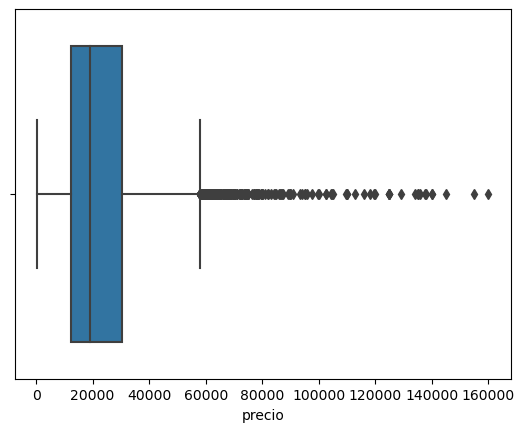

In [22]:
#representación gráfica de outliers

sns.boxplot(x=coches_dataset['precio'])
plt.show()

# Análisis de la información

### Distribución general de las variables númericas

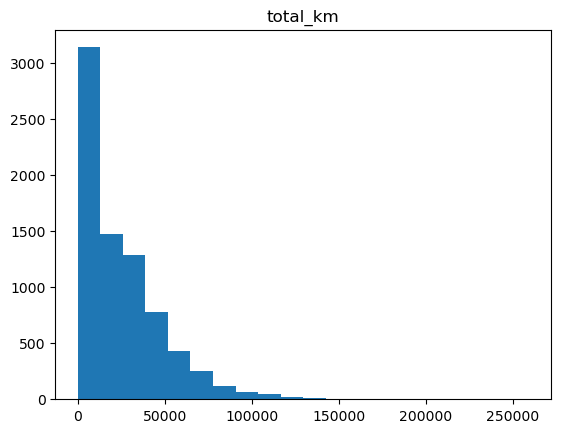

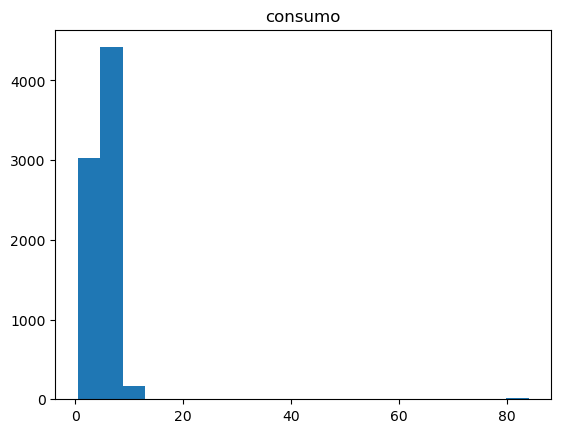

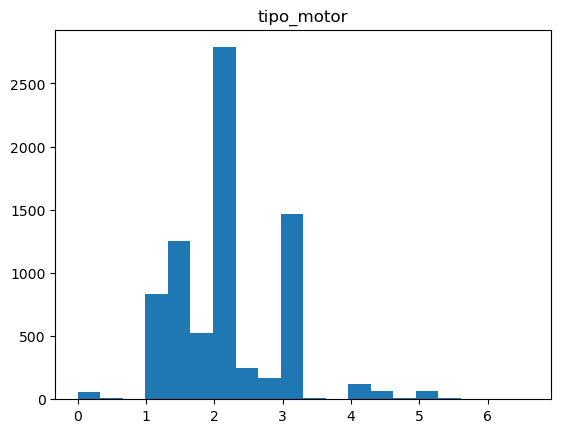

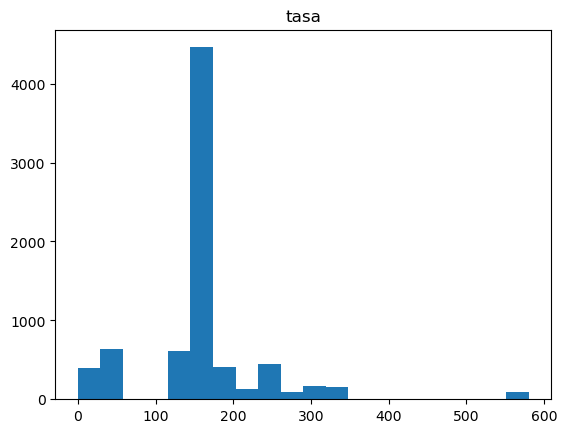

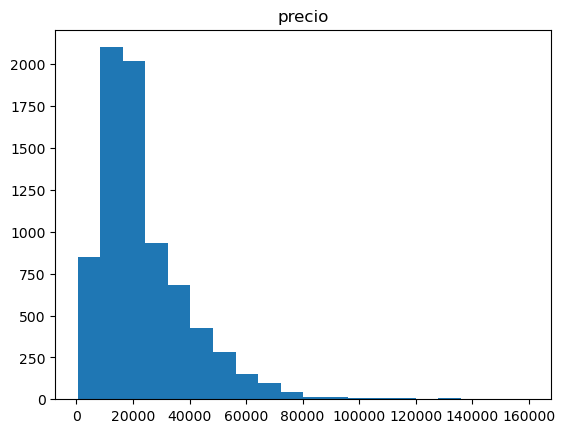

In [23]:
## distribución general de las variables númericas

for col in ['total_km', 'consumo', 'tipo_motor', 'tasa', 'precio']:
    plt.hist(coches_dataset[col], bins = 20)
    plt.title(col)
    plt.show()
    plt.close()

Se observa que el total de km recorridos se distribuye entre 0 a 100.000km; el consumo se mantiene por debajo de 20km/litro; el tipo de motor predominante es entre 2.0 y 2.5 cc; la tasa  predominante es de 150 euros de impuesto para la circulación del coche; y por último, el precio, aunque se encuentra en un rango entre 0 y 80000 euros, su distribución se concentra en los 20000 a 30000 euros. 

### Distribución de la variable precio   (Rta a pregunta 1)

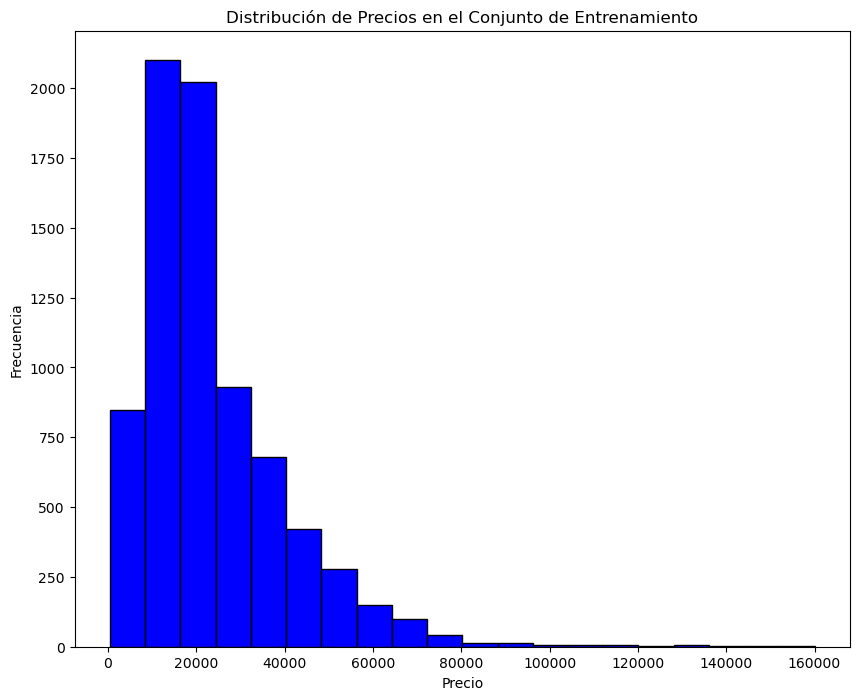

In [24]:
## Respuesta a pregunta 1. Representar gráficamente la distribución de la variable precio en el conjunto 

# Configuración del tamaño de la figura
plt.figure(figsize=(10, 8))

# Crear un histograma
plt.hist(coches_dataset['precio'], bins=20, color='blue', edgecolor='black')

# Configuración de etiquetas y título
plt.title('Distribución de Precios en el Conjunto de Entrenamiento')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

En este gráfico exclusivo del precio, se observa como es predmoninante encontrar coches con precios entre los 10000 y 30000 euros en el data set completo; observando a su vez, pocos coches con precios mayores de 45000 euros hasta los 80000-100000 euros, los cuales hacen referencia a aquellos autos de marcas de lujo, como audi o bmw. 

### Precios promedio por marca de acuerdo con dataset (Rta pregunta 2)

In [25]:
# se calcula el precio promedio por marca

precio_promedio_marca = coches_dataset.groupby ('marca')['precio'].mean()
precio_promedio_marca

marca
audi        43055.277247
bmw         38015.820041
ford        15933.644649
hyundi      14763.489596
merc        30236.407711
skoda       13908.515674
toyota      18778.782427
vauxhall    11978.981818
vw          21862.010354
Name: precio, dtype: float64

Se observa que audi y bmw son las marcas más costosas incluidas en el dataset

### Marca más cara y más barata 

In [26]:

# marca más cara

marca_mas_cara = precio_promedio_marca.idxmax()

marca_mas_cara


'audi'

In [27]:
marca_mas_barata = precio_promedio_marca.idxmin()
marca_mas_barata

'vauxhall'

Se observa que la marca más cara corresponde a "audi", mientras que la más barata es "vauxhall"

### Representar gráficamente la dependencia entre el precio y el kilometraje (Rta pregunta 3)

<Axes: xlabel='precio', ylabel='total_km'>

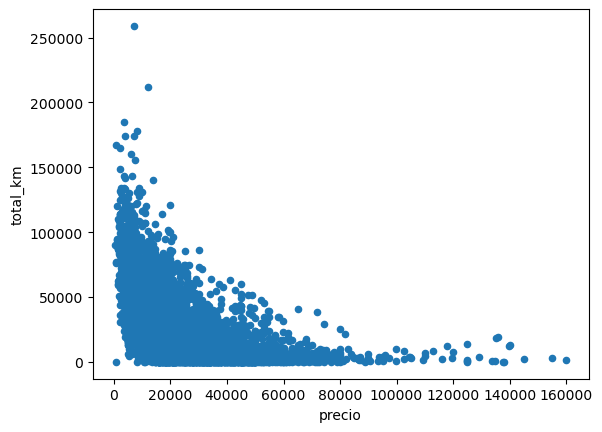

In [28]:
# Relación entre la variable precio y el kilometraje
coches_dataset.plot(x = 'precio', y = 'total_km', kind = 'scatter')

Se observa una alta dependencia entre las variables, permitiendo inferir que a mayor cantidad de kilometros recorridos por el coche, este pierde su valor 

### Correlación entre variables numéricas 

In [29]:
coches_dataset.select_dtypes(include = 'number').corr() ##correlación entre las variables númericas

,ID,fecha,total_km,consumo,tipo_motor,tasa,precio
ID,1.000000,0.004029,0.001137,-0.004178,0.016248,0.009602,0.018487
fecha,0.004029,1.000000,-0.753325,0.061699,0.032041,-0.200159,0.498388
total_km,0.001137,-0.753325,1.000000,-0.097713,-0.018777,0.124939,-0.486950
consumo,-0.004178,0.061699,-0.097713,1.000000,0.314323,0.316232,0.263585
tipo_motor,0.016248,0.032041,-0.018777,0.314323,1.000000,0.456532,0.623995
tasa,0.009602,-0.200159,0.124939,0.316232,0.456532,1.000000,0.142273
precio,0.018487,0.498388,-0.486950,0.263585,0.623995,0.142273,1.000000


# 
Se observa correlación principalmente con tipo de motor, con fecha de modelo, consumo y tasa

Hasta aquí el análisis general se hizo con el dataset completo, uniendo los datos de train y test, de aquí en adelante, se realizan las transformaciones y normalizaciones por dataset. No obstante, con el total de km también existe un comportamiento relacionado según el plot realizado

# Preprocesamiento
Aquí, se inicia todo el preprocesamiento de los datos, aislamiento de variables, codificación de las variables de texto a número y normalización de las variables numéricas a escalas similares para facilitar su comparación

## Aislar las variables de la variable target (separación de características y etiqueta)
Aquí se separa cada dataset entre las variables características (independientes al precio) y la variable objetivo (precio), como la variable dependiente de aquellas características. Esto con el fin de entrenar el modelo para predecir la variable objetivo a partir de las características. El modelo aprenderá patrones y relaciones en los datos durante esta fase de entrenamiento.

In [30]:
x_train = coches_train.drop('precio', axis=1)  # aislar las variables de la variable target en un dataframe: se dejan todas las columnas excepto 'precio'
target_train = coches_train['precio']  # Se toma la columna 'precio' como la variable objetivo (target), esta será usada en el entrenamiento del modelo

x_test = coches_test.drop('precio', axis=1)  # aislar las variables de la variable target en un dataframe: se dejan todas las columnas excepto 'precio'
target_test = coches_test['precio']  # Se toma la columna 'precio' como la variable objetivo (target), estas será usada en la prueba del modelo

x_train = x_train.drop('ID', axis=1)
x_test = x_test.drop('ID', axis=1)
                     


In [31]:
# confirmar aislamiento y estado final de cada dataframe
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4960 entries, 0 to 4959
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   marca             4960 non-null   object 
 1   modelo            4960 non-null   object 
 2   fecha             4960 non-null   int64  
 3   tipo_cambio       4960 non-null   object 
 4   total_km          4960 non-null   int64  
 5   tipo_combustible  4960 non-null   object 
 6   consumo           4960 non-null   float64
 7   tipo_motor        4960 non-null   float64
 8   tasa              4960 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 348.9+ KB


In [32]:
# confirmar aislamiento y estado final de cada dataframe
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2672 entries, 0 to 2671
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   marca             2672 non-null   object 
 1   modelo            2672 non-null   object 
 2   fecha             2672 non-null   int64  
 3   tipo_cambio       2672 non-null   object 
 4   total_km          2672 non-null   int64  
 5   tipo_combustible  2672 non-null   object 
 6   consumo           2672 non-null   float64
 7   tipo_motor        2672 non-null   float64
 8   tasa              2672 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 188.0+ KB


## Verificar consistencia entre datasets

In [33]:
# Se verifica que los dataframes de train y test (sin variable target), tengan consistencia entre sí

assert x_train.columns.tolist() == x_test.columns.tolist(), "Las columnas de X_train y X_test no coinciden"


## Transformación de columnas : codificación de variables de texto (categóricas) y normalización de variables numéricas

1. Se utiliza la opción "column transformer" con el fin de hacer que durante el preprocesamiento se tranforme columna por columna de cada data set, incluso los nuevos datos, de texto a número o de número a escala numérica, según se defina. 

2. One-Hot Encoding: para la transformación de las variables de texto o categóricas, he utilizado la cual crea nuevas columnas, indicando la presencia (o ausencia) de cada categoría posible en la variable original

3. Escalador MinMaxScaler: con el fin de normalizar las variables númericas en una escala de 0 a 1.

4. Guardar el preprocesamiento en la variable definida "preprocessor" y posteriormente se aplica a cada dataframe de train y test. Cabe indicar que para el dataframe de test no se aplica ajuste (fit) para no generar fuga de datos

5. Nuevos dataframe: posteriormente, los datos transformados son archivados en nuevos dataframes_processed

6. Guardar el preprocessor en una "librería" = joblib

Nota: cabe mencionar que esta fue la primera manera que encontré de llevar a cabo el ejercicio, después de varios errores. Luego, encontré que es posible construir un pipeline que resume el preprocesamiento y lo usé más adelante como un ejercicio adicional para mi proceso de aprendizaje

In [34]:
# Instanciar el OneHotEncoder

encoder = prep.OneHotEncoder(sparse_output = False, min_frequency = 0.01, handle_unknown = 'infrequent_if_exist')

scaler = prep.MinMaxScaler()

# Ajustar y transformar 

preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, ['fecha', 'total_km', 'consumo', 'tipo_motor', 'tasa']),
        ('cat', encoder, ['marca', 'modelo', 'tipo_cambio', 'tipo_combustible'])
    ])

# Transformar el conjunto de entrenamiento
x_train_processed = preprocessor.fit_transform(x_train)


# Transformar el conjunto de prueba
x_test_processed = preprocessor.transform(x_test) ## no ajustar el dataset de prueba

# Crear dataframes

x_train_processed_df = pd.DataFrame(x_train_processed, columns=preprocessor.get_feature_names_out())
x_test_processed_df = pd.DataFrame(x_test_processed, columns=preprocessor.get_feature_names_out())

In [35]:
# Verificación de dataframe de train transformado 
x_train_processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4960 entries, 0 to 4959
Data columns (total 65 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   num__fecha                                4960 non-null   float64
 1   num__total_km                             4960 non-null   float64
 2   num__consumo                              4960 non-null   float64
 3   num__tipo_motor                           4960 non-null   float64
 4   num__tasa                                 4960 non-null   float64
 5   cat__marca_audi                           4960 non-null   float64
 6   cat__marca_bmw                            4960 non-null   float64
 7   cat__marca_ford                           4960 non-null   float64
 8   cat__marca_hyundi                         4960 non-null   float64
 9   cat__marca_merc                           4960 non-null   float64
 10  cat__marca_skoda                    

# Aprendizaje automático

Hasta aquí he realizado el preprocesamiento de los datos, dando paso a la construcción del modelo de aprendizaje automático, he probado dos modelos para la predicción del precio del coche usado con ciertas características. 

In [36]:
#guardo el proceso de transformación de datos
joblib.dump(preprocessor, 'preprocessor.joblib')

['preprocessor.joblib']

In [37]:
pip install joblib


Note: you may need to restart the kernel to use updated packages.


In [38]:
# importo paquetes de librerías necesarios

import joblib
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression


In [39]:
# confirmo el tamaño y consistencia de los dataframes de train y test a usar en los modelos de AA

x_train_processed_df.shape, x_test_processed_df.shape

((4960, 65), (2672, 65))

## Regresión lineal

In [40]:
# Creo el objeto del modelo con parámetros por defecto
modelo_lr = LinearRegression()

# Entreno el modelo con el conjunto de train y su target aislada en pasos previos (preprocesamiento [IN] 20)
modelo_lr.fit(x_train_processed_df, target_train)

LinearRegression()

In [41]:
print('Término independiente: ', modelo_lr.intercept_)

## determina dónde la línea de regresión corta el eje vertical (eje Y) cuando todas las variables independientes son cero.

##representa el valor predicho de la variable dependiente cuando todas las variables independientes son nulas.


Término independiente:  3.41750344672409e+16


In [42]:
for name, value in zip(modelo_lr.feature_names_in_, modelo_lr.coef_):
    print('Variable %s, coeficiente: %.3f' % (name, value))

Variable num__fecha, coeficiente: 38172.571
Variable num__total_km, coeficiente: -31126.177
Variable num__consumo, coeficiente: 19612.258
Variable num__tipo_motor, coeficiente: 55888.328
Variable num__tasa, coeficiente: -15899.175
Variable cat__marca_audi, coeficiente: -5240013560971214.000
Variable cat__marca_bmw, coeficiente: -5240013560972669.000
Variable cat__marca_ford, coeficiente: -5240013560993604.000
Variable cat__marca_hyundi, coeficiente: -5240013560979375.000
Variable cat__marca_merc, coeficiente: -5240013560976377.000
Variable cat__marca_skoda, coeficiente: -5240013560990624.000
Variable cat__marca_toyota, coeficiente: -5240013560988963.000
Variable cat__marca_vauxhall, coeficiente: -5240013560992179.000
Variable cat__marca_vw, coeficiente: -5240013560990458.000
Variable cat__modelo_ 6 Series, coeficiente: -771584841180934.875
Variable cat__modelo_ 7 Series, coeficiente: -771584841173426.750
Variable cat__modelo_ A7, coeficiente: -771584841178890.000
Variable cat__modelo_ 

Cada coeficiente nos indica cómo varía el target al aumentar cada una de las variables de entrada, los valores muy alto y muy bajo se pueden deber a sobreajuste, a una deficiente escalarización o la presencia de aquellos outliers de precio de coches de lujo

In [43]:
# Se calula el R en los datos de entrenamiento

print('R2 en training: ', modelo_lr.score(x_train_processed_df, target_train))

R2 en training:  0.8073783746292764


In [44]:
#Se calcula el R de los datos de test

print('R2 en test: ', modelo_lr.score(x_test_processed_df, target_test))

R2 en test:  0.7919985144342766


### Predicciones del modelo de Regresión Lineal con el dataset de test

In [45]:
# Predicciones sobre el conjunto de test

predicciones_precio_test = modelo_lr.predict(x_test_processed_df)

print('Primeras 5 predicciones: ', predicciones_precio_test[:5])
print('Valores reales: ', target_test.values[:5])

Primeras 5 predicciones:  [46384. 26532. 50232. 13776. 52944.]
Valores reales:  [38000 23495 59999 16713 46000]


### Cuantificar diferencias 

In [46]:
# Calculamos el MAE y el MAPE en el conjunto de test
mae_test = mean_absolute_error(target_test, predicciones_precio_test)
mape_test = mean_absolute_percentage_error(target_test, predicciones_precio_test)

print('MAE en test: %.3f' % mae_test)
print('MAPE en test: %.3f' % mape_test)

MAE en test: 4599.387
MAPE en test: 0.310


El MAE nos indica un valor de 4669 euros (valor absoluto) entre las predicciones del modelo y el valor real, con un Porcentaje Promedio de Error MAPE de 3%

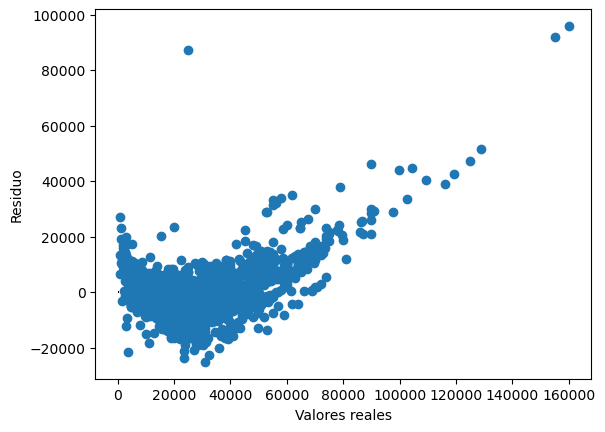

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

residuals = target_test - predicciones_precio_test 

plt.scatter(target_test, residuals)
plt.hlines(0, xmin=40, xmax=320, linestyles='--', color='k')
plt.xlabel('Valores reales')
plt.ylabel('Residuo')
plt.show()

Se observan que aunque los residuos se acercan al cero (deseable), se conservan un pequeño patrón (no deseable)

### Guardar modelo LR

In [48]:
# Guardo modelo para luego usarlo en la predicción del precio con nuevos datos

joblib.dump(modelo_lr, 'modelo_regresion_lineal.pkl')

['modelo_regresion_lineal.pkl']

### Resultados de la regresión lineal: 
    
Con este modelo he obtenido un R en el test de 0.79, un MAE en test de 4669 euros y un  MAPE en test: 0.317.

Nota: Por cuestiones de tiempo (pues terminar este 1er ejercicio me ha llevado bastante tiempo) no he probado con más modelos, pero me gustaría en su momento profundizar. 


### Predicción del precio con el modelo de Regresión Lineal

In [49]:
#Cargo modelo

modelo_regresion_lineal = joblib.load('modelo_regresion_lineal.pkl')

#Pipeline de preprocesamiento (onehot encoder de variables categóricas a número y minmaxscaler para normalizar variables númericas)

preprocessing_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])


### Data procesada para resolver la pregunta

In [50]:
# Creo un dataframe con los nuevos datos que corresponden a las características con las que quiero predecir el precio de venta del coche usado 
new_data= pd.DataFrame({'marca':['audi'],
                        'modelo': ['A7'],
                        'fecha':[2020],
                        'total_km': [5000],
                        'tipo_cambio': ['Automatic'],
                        'tipo_combustible': ['hybrid'],
                        'consumo': [5.5],
                        'tipo_motor': ['4.0'],
                        'tasa': [200]})

new_data

,marca,modelo,fecha,total_km,tipo_cambio,tipo_combustible,consumo,tipo_motor,tasa
0,audi,A7,2020,5000,Automatic,hybrid,5.5,4.0,200


In [66]:
# aplico el pipe line de preprocesamiento al nuevo dataframe con el fin de aplicar el onehotencoder y minmaxscaler

new_data_processed = preprocessing_pipeline.transform(new_data)

### Predicción de precio de coche audi A7 por Regresión Lineal (Rta pregunta 5)

In [52]:
# Realizo la predicción del precio aplicando el modelo a los nuevos datos
new_price_prediction_lr = modelo_regresion_lineal.predict(new_data_processed)
new_price_prediction_lr

D:\ANACONDA\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([62760.])

He obtenido que mi amigo que quiere vender un audi A7 de 2020 con 5000 km, cambio automático, combustible híbrido, consumo de 5.5 l/100km y motor 4.0. La tasa de circulación es de 200€, debe venderlo en 62760 euros. 

### Aplicación del modelo de regresión lineal probando con la creación de un Pipeline que contiene los pasos de preprocesamiento y el modelo 

Como mencioné anteriormente, en el desarrollo del ejercicio comprendí que existe la opción de incorporar los pasos de preprocesamiento y el modelo en un pipeline, simplificando el flujo de trabajo. Aquí lo he probado, obteniendo el mismo resultado de predicción del precio

In [53]:
# Creo el pipeline que contiene los pasos de preprocesamiento y modelo. El preprocesamiento ya lo he generado en pasos previos

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('modelo_regresion_lineal', LinearRegression())
])

# Ajusto el modelo con el dataframe de entrenamiento
model_pipeline.fit(x_train, target_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['fecha', 'total_km',
                                                   'consumo', 'tipo_motor',
                                                   'tasa']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                min_frequency=0.01,
                                                                sparse_output=False),
                                                  ['marca', 'modelo',
                                                   'tipo_cambio',
                                                   'tipo_combustible'])])),
                ('modelo_regresion_lineal', LinearRegression())])

In [54]:
# Predicciones sobre el conjunto de test obteniendo los mismos resultados del flujo anterior

predicciones_precio_test2 = model_pipeline.predict(x_test)

print('Primeras 5 predicciones: ', predicciones_precio_test2[:5])
print('Valores reales: ', target_test.values[:5])

Primeras 5 predicciones:  [46384. 26532. 50232. 13776. 52944.]
Valores reales:  [38000 23495 59999 16713 46000]


In [55]:
# Predicción del precio con los nuevos datos, obteniendo el mismo resultado del flujo anterior
new_price_prediction_lr2 = model_pipeline.predict(new_data)
new_price_prediction_lr2

array([62760.])

Mediante esta otra opción de flujo de trabajo, he obtenido que mi amigo debe vender el auto en 62760 euros, conservando la misma predicción anterior. 

Ahora bien, probaré con otro modelo: árbol de decisión

## Árbol de decisión

In [56]:
#importo el modelo de la librería de sklearn

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# Los inicialiamos con sus parámetros por defecto (salvo la semilla)
tree_reg = DecisionTreeRegressor(criterion = 'poisson', max_depth=15, min_samples_leaf=1, random_state = 42)

# creo un pipeline para el preprocesamiento y la aplicación del modelo de árbol de decisión

model_pipeline_tree = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model_tree', DecisionTreeRegressor())
])

# ajusto el modelo con el dataframe de entrenamiento

model_pipeline_tree.fit(x_train, target_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['fecha', 'total_km',
                                                   'consumo', 'tipo_motor',
                                                   'tasa']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                min_frequency=0.01,
                                                                sparse_output=False),
                                                  ['marca', 'modelo',
                                                   'tipo_cambio',
                                                   'tipo_combustible'])])),
                ('model_tree', DecisionTreeRegressor())])

In [57]:
# realizo las predicciones del modelo probando con el dataframe de test, encontrando diferencias con el modelo de LR

pred_precio_test_tree = model_pipeline_tree.predict(x_test)
pred_precio_test_tree

array([38000., 22795., 57526., ..., 20491., 19500.,  2990.])

In [58]:
# imprimo el coeficiente R del modelo ajustado al dataframe de entrenamiento

print('R2 en training: ', model_pipeline_tree.score(x_train, target_train))

R2 en training:  0.9998242880606557


In [59]:
# imprimo el coeficiente R del modelo ajustado al dataframe de entrenamiento alcanzando un buen valor

print('R2 en test: ', model_pipeline_tree.score(x_test, target_test))

R2 en test:  0.9260076881684027


In [60]:
mae_test = mean_absolute_error(target_test,pred_precio_test_tree)
mape_test = mean_absolute_percentage_error(target_test,pred_precio_test_tree)
print('MAE en test: %.3f' % mae_test)
print('MAPE en test: %.3f' % mape_test)
print('')

MAE en test: 2431.261
MAPE en test: 0.118



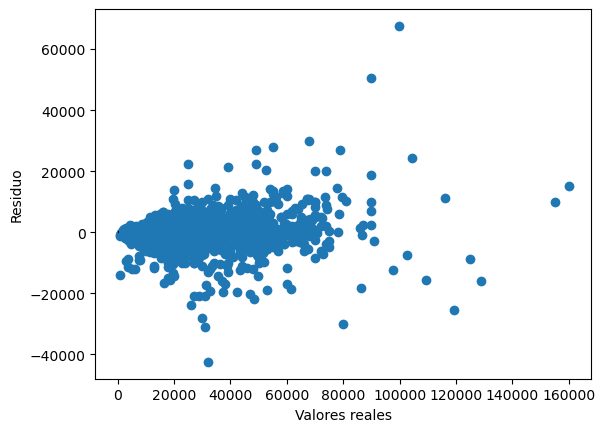

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

residuals = target_test - pred_precio_test_tree

plt.scatter(target_test, residuals)
plt.hlines(0, xmin=40, xmax=320, linestyles='--', color='k')
plt.xlabel('Valores reales')
plt.ylabel('Residuo')
plt.show()

#### El modelo de árbol de decisión probado con la data de test muestra menor error que con regresión lineal y un R mayor a 0.9

1. Regresión lineal 
R en test: 0.7
MAE en test: 4599.387
MAPE en test: 0.310
2. Árbol de decisión
R en test: 0.93
MAE en test: 2431.261
MAPE en test: 0.118

### Predicción de precio de coche audi A7 por Árbol de decisión (Rta pregunta 5)

In [67]:
# Aplico el modelo para predecir el precio de venta del auto 
new_price_prediction_tree = model_pipeline_tree.predict (new_data)
new_price_prediction_tree

array([84496.])

#### He obtenido que mi amigo que quiere vender un audi A7 de 2020 con 5000 km, cambio automático, combustible híbrido, consumo de 5.5 l/100km y motor 4.0. La tasa de circulación es de 200€, debe venderlo en 84496 euros

## Variables más significativas (Rta pregunta 4)

Aquí deseo ver cuál es la variable más importante en el modelo de árbol de decisión

In [63]:
# asigno las características
feature_importances = model_pipeline_tree.named_steps['model_tree'].feature_importances_

for var, value in zip(x_train.columns, feature_importances):
    print('%s: %.3f' % (var, value))


marca: 0.273
modelo: 0.049
fecha: 0.108
tipo_cambio: 0.444
total_km: 0.012
tipo_combustible: 0.009
consumo: 0.012
tipo_motor: 0.023
tasa: 0.000


Puedo ver que la variable más importante para el modelo es la "fecha", seguida (aunque de lejos) por la variable "modelo".

# Pruebas con más ejemplos
He realizado una prueba adicional con más datos, para visualizar cómo funciona el modelo con otro dataset de datos nuevos

In [64]:
new_data2= pd.DataFrame({'marca':['audi', 'merc', 'skoda', 'bmw'],
                        'modelo': ['a7', 'AMG', 'Scala', '6 series'],
                        'fecha':[2020, 2018, 2020, 2021],
                        'total_km': [5000, 4000, 51000, 12000],
                        'tipo_cambio': ['automatic', 'manual','automatic', 'manual'],
                        'tipo_combustible': ['hybrid', 'Petrol', 'Diesel', 'hybrid'],
                        'consumo': [5.5, 4.4, 5.5, 3.0],
                        'tipo_motor': ['4.0', '4.9', '2.2', '4.9'],
                        'tasa': [200, 300, 200, 50]})

new_data2

,marca,modelo,fecha,total_km,tipo_cambio,tipo_combustible,consumo,tipo_motor,tasa
0,audi,a7,2020,5000,automatic,hybrid,5.5,4.0,200
1,merc,AMG,2018,4000,manual,Petrol,4.4,4.9,300
2,skoda,Scala,2020,51000,automatic,Diesel,5.5,2.2,200
3,bmw,6 series,2021,12000,manual,hybrid,3.0,4.9,50


In [68]:
new_price_prediction_tree = model_pipeline_tree.predict (new_data2)
new_price_prediction_tree

array([84496., 95950., 38489., 46995.])

Así encuentro que los autos pueden venderse en:

1. Audi : 84496 euros
2. Mercedes: 95950 euros, pues aunque no es más nuevo, tiene menos km recorridos y mejor consumo
3. Skoda : 38489 euros, pues tiene muchos km recorridos, mucho consumo y un motor poco potente
4. bmw: 46995 euros, pues aunque es más nuevo que audi y merc, tiene un total de km más alto, lo cual puede influir en el resultado

# Respuestas a las preguntas planteadas: 

1. Pregunta 1. Representar gráficamente la distribución de la variable precio en el conjunto de entrenamiento.

Rta: Ver In:[14]

2. Pregunta 2. ¿Cuál es la marca más cara en promedio? ¿Y la más barata?

Rta. 
Marca más cara en promedio: audi 
Marca más barata: vauxhall

3. Pregunta 3. Representar gráficamente la dependencia entre el precio y el kilometraje.

Rta: Ver In:[169]

4. Pregunta 4. Calcular las variables más significativas, ya sea mediante un test estadístico o analizando el modelo entrenado.

Rta: Puedo ver que la variable más importante para el modelo es la "fecha", seguida (aunque de lejos) por la variable "modelo".

5. Pregunta 5. Un amigo quiere vender un audi A7 de 2020 con 5000 km, cambio automático, combustible híbrido, consumo de 5.5 l/100km y motor 4.0. La tasa de circulación es de 200€. ¿A cuánto debería venderlo?

Rta. Modelo de Árbol de decisión: 84496 euros
